In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from src.utils.load_data import load_data
import numpy as np


In [9]:
train_path = "../data/embeddings/VGG-Face/train_VGG-Face_embeddings_id.npz"
test_path = "../data/embeddings/VGG-Face/test_VGG-Face_embeddings_id.npz"
x_train, y_train, x_test, y_test = load_data(train_path=train_path, test_path=test_path)


x_train: 2104 y_train: 2104
x_test: 553 y_test: 553
x_train_shape: (2622,)
x_test_shape: (2622,)


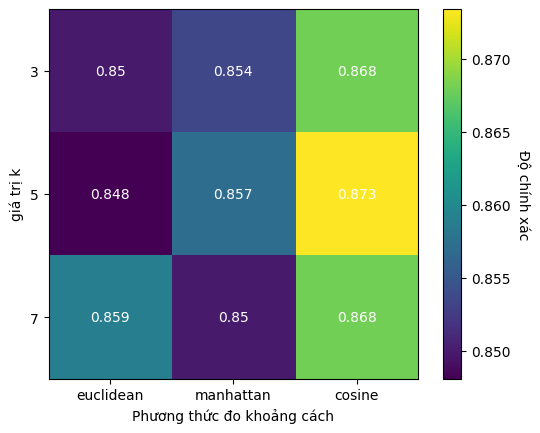

In [11]:
# weights=uniform

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'cosine']

acc_scores = []

for k in k_values:
    for distance in distance_metrics:
        # Tạo đối tượng KNeighborsClassifier với các tham số
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance, weights='uniform')
        # Huấn luyện mô hình
        knn.fit(x_train, y_train)
        # Đánh giá mô hình trên tập dữ liệu kiểm tra
        y_pred = knn.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        acc_scores.append(acc)

acc_scores = np.array(acc_scores).reshape(len(k_values), len(distance_metrics))
fig, ax = plt.subplots()
im = ax.imshow(acc_scores, cmap='viridis')
ax.set_xticks(np.arange(len(distance_metrics)))
ax.set_yticks(np.arange(len(k_values)))
ax.set_xticklabels(distance_metrics)
ax.set_yticklabels(k_values)
ax.set_xlabel('Phương thức đo khoảng cách')
ax.set_ylabel('giá trị k')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Độ chính xác', rotation=-90, va="bottom")

for i in range(len(k_values)):
    for j in range(len(distance_metrics)):
        text = ax.text(j, i, round(acc_scores[i, j], 3),
        ha="center", va="center", color="w")

plt.show()

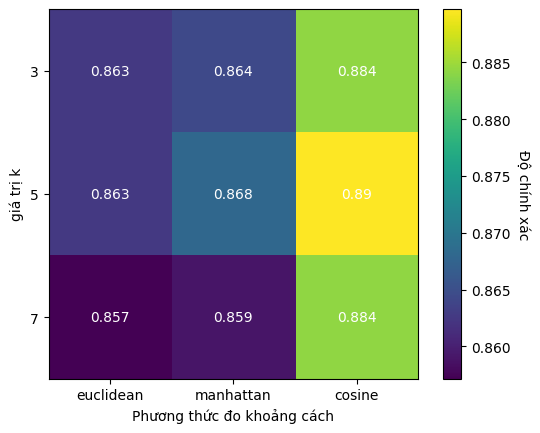

In [12]:
#weights=distance

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'cosine']

acc_scores = []

for k in k_values:
    for distance in distance_metrics:
        # Tạo đối tượng KNeighborsClassifier với các tham số
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance, weights='distance')
        # Huấn luyện mô hình
        knn.fit(x_train, y_train)
        # Đánh giá mô hình trên tập dữ liệu kiểm tra
        y_pred = knn.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        acc_scores.append(acc)

acc_scores = np.array(acc_scores).reshape(len(k_values), len(distance_metrics))
fig, ax = plt.subplots()
im = ax.imshow(acc_scores, cmap='viridis')
ax.set_xticks(np.arange(len(distance_metrics)))
ax.set_yticks(np.arange(len(k_values)))
ax.set_xticklabels(distance_metrics)
ax.set_yticklabels(k_values)
ax.set_xlabel('Phương thức đo khoảng cách')
ax.set_ylabel('giá trị k')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Độ chính xác', rotation=-90, va="bottom")

for i in range(len(k_values)):
    for j in range(len(distance_metrics)):
        text = ax.text(j, i, round(acc_scores[i, j], 3),
        ha="center", va="center", color="w")

plt.show()

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa các giá trị của tham số k và phương thức tính khoảng cách
k_values = [1, 3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'cosine']

# Tạo đối tượng KNeighborsClassifier
knn = KNeighborsClassifier()

# Tạo bộ tham số để tìm kiếm lưới
param_grid = {'n_neighbors': k_values, 'metric': distance_metrics}

# Tìm kiếm lưới trên tập dữ liệu huấn luyện
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# In ra bộ tham số tốt nhất
print("Bộ tham số tốt nhất:", grid_search.best_params_)


Bộ tham số tốt nhất: {'metric': 'cosine', 'n_neighbors': 5}
